# Cryptanalysis of the Vigenere cipher
**developed by:**

**Sayed Soroush Daftarian (3806188) and Seyyed Mostafa Rahimi (3800582)**

inputs : Cyphertext and maximum key length

In [1]:
Ciphertext_Exercise3 = "PATGSJKGSPFPCTSSKHOIGSDHNBCUHVIHKSHVBKPBQLEGVFSHPLTQFLYRWSRLYBSSRPPPPGIUOTUSHVPTZSVLNBCHCIWMIZSZKPWWZLZKXJWUCMWFCBCAACBKKGDBHOAPPMHVBKPBQLDXKWGPPXSZCUZHCNCVWGSOGRAWIVSTPHROFLBHGHVLYNQIBAEEWWGYAMJFBDDBRVVLKIIWAPOMXQOSHRPBHPYBEOHLZPDIZKXXCCZVJZTFHOWGIKCDAXZGCMYHJFGLPATKOYSTHBCAPHTBRZKJJWQRHR"

In [2]:
MAX_KEY_LEN = 7

# Constants and variables for the whole exercise:
At first it is necessary to determine each words of english language index of coincidence. so we build a dictionary which can identify all english words' frequency. Also it is necessary to determine the avarage of english words IC.

In [3]:
EN_REL_FREQ = {'A': 0.08167, 'B': 0.01492, 'C': 0.02782, 'D': 0.04253, 'E': 0.12702, 'F': 0.02228, 'G': 0.02015,
               'H': 0.06094, 'I': 0.06966, 'J': 0.00153, 'K': 0.00772, 'L': 0.04025, 'M': 0.02406, 'N': 0.06749,
               'O': 0.07507, 'P': 0.01929, 'Q': 0.00095, 'R': 0.05987, 'S': 0.06327, 'T': 0.09056, 'U': 0.02758,
               'V': 0.00978, 'W': 0.02360, 'X': 0.00150, 'Y': 0.01974, 'Z': 0.00074}

EN_IC = 0.65

# Some functions to work better with the text
now we need some functions to analyse the text and get it ready for frequency analysis.

In [4]:
def get_blocks(text, size):
    blocks = [text[i:i+size] for i in range(0, len(text)-size, size)]
    return blocks


def get_columns(text_blocks):
    group_size = len(text_blocks[0])
    columns = []
    for letter_count in range(group_size):
        column = ''
        for group_count in range(len(text_blocks)):
            column += text_blocks[group_count][letter_count]
        columns.append(column)
    return columns


def to_blocks(cols):
    col_size = len(cols[0])
    blocks = []
    for letter in range(col_size):
        block = ''
        for col in range(len(cols)):
            block += cols[col][letter]
        blocks.append(block)
    return blocks

## Frequency Analysis
Now it is time for frequency analysis.

first we have to count every letter in the cipher text. for this we made get_letter_counts function.

In [5]:
import string
import matplotlib.pyplot as plt
import numpy as np

def get_letter_counts(text):

  Count_of_Letter_Ni ={'A': 0 , 'B':0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0,
                'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0,
                'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0,
                'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}
  res = {i: text.count(i) for i in set(text)}
  Count_of_Letter_Ni.update(res)
  return Count_of_Letter_Ni
cipher_dictionary = get_letter_counts(Ciphertext_Exercise3)
print(cipher_dictionary)



{'A': 11, 'B': 18, 'C': 16, 'D': 7, 'E': 4, 'F': 8, 'G': 14, 'H': 22, 'I': 11, 'J': 7, 'K': 15, 'L': 12, 'M': 6, 'N': 4, 'O': 10, 'P': 23, 'Q': 6, 'R': 10, 'S': 18, 'T': 10, 'U': 5, 'V': 12, 'W': 14, 'X': 7, 'Y': 7, 'Z': 13}


Now we can calculate every word's frequency. also its not bad to visualize the frequencies of the ciphered tex and the frequency of english language frequency.

{'A': 0.03793103448275862, 'B': 0.06206896551724138, 'C': 0.05517241379310345, 'D': 0.02413793103448276, 'E': 0.013793103448275862, 'F': 0.027586206896551724, 'G': 0.04827586206896552, 'H': 0.07586206896551724, 'I': 0.03793103448275862, 'J': 0.02413793103448276, 'K': 0.05172413793103448, 'L': 0.041379310344827586, 'M': 0.020689655172413793, 'N': 0.013793103448275862, 'O': 0.034482758620689655, 'P': 0.07931034482758621, 'Q': 0.020689655172413793, 'R': 0.034482758620689655, 'S': 0.06206896551724138, 'T': 0.034482758620689655, 'U': 0.017241379310344827, 'V': 0.041379310344827586, 'W': 0.04827586206896552, 'X': 0.02413793103448276, 'Y': 0.02413793103448276, 'Z': 0.04482758620689655}


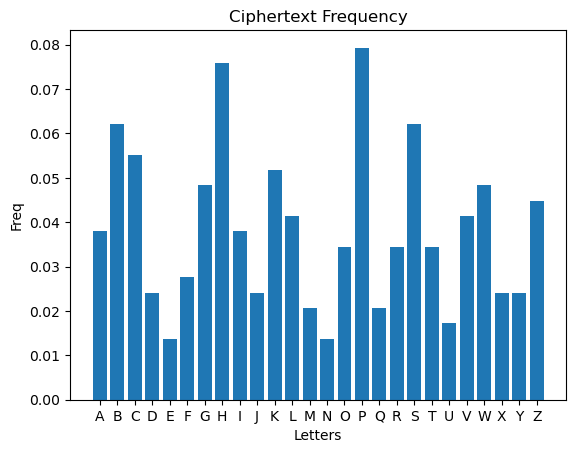

In [6]:
import matplotlib.pyplot as plt

def _get_letter_frequencies(text):
    letter_counts = get_letter_counts(text)
    frequencies = {letter: count/len(text) for letter, count in letter_counts.items()}
    return frequencies
frequence_of_cipher_dictionary = _get_letter_frequencies(Ciphertext_Exercise3)
print(frequence_of_cipher_dictionary)

letter_Ciphertext = list(frequence_of_cipher_dictionary.keys())
freq_each_Ciphertext = list(frequence_of_cipher_dictionary.values())

English_letter = letter_Ciphertext
freq_each_Englishtxt = list(EN_REL_FREQ.values())
X_axis = np.arange(len(frequence_of_cipher_dictionary))


plt.bar(X_axis , freq_each_Ciphertext, tick_label = letter_Ciphertext)
plt.title("Ciphertext Frequency")
plt.xticks(X_axis, letter_Ciphertext)
plt.xlabel("Letters")
plt.ylabel("Freq")
plt.show()

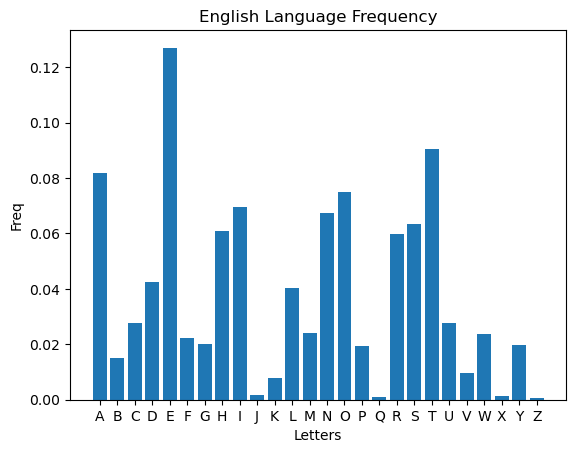

In [7]:
plt.bar(X_axis , freq_each_Englishtxt,tick_label = letter_Ciphertext)
plt.title("English Language Frequency")
plt.xticks(X_axis, letter_Ciphertext)
plt.xlabel("Letters")
plt.ylabel("Freq")
plt.show()

now we write the function below for shifting all letters i positions back in the alphabet

In [8]:
def shifting(text, amount):
    shifted = ''
    letters = string.ascii_uppercase
    for letter in text:
        shifted += letters[(letters.index(letter)-amount) % len(letters)]
    return shifted
def _corr(text, lf):
    return sum([(lf[letter] * EN_REL_FREQ[letter]) for letter in text])


now its time to calculate the key for different key legnthes

In [9]:
def _find_key_letter(text, lf):
    key_letter = ''
    max_corr = 0
    for count, letter in enumerate(string.ascii_uppercase):
        shifted = shifting(text=text, amount=count)
        corr = _corr(text=shifted, lf=lf)
        if corr > max_corr:
            max_corr = corr
            key_letter = letter
    return key_letter


def restore_key(cyphertext, key_len):
    key = ''
    blocks = get_blocks(text=cyphertext, size=key_len)
    columns = get_columns(blocks)
    frequencies = _get_letter_frequencies(text=cyphertext)
    for column in columns:
        key += _find_key_letter(text=column, lf=frequencies)
    return key

# Index of Coincidence Calculation

now with the functions written before calculating the Ic is possible:

In [10]:
from sys import maxsize
def _ic(letter_counts):
    numerator = sum([letter_counts[l]*(letter_counts[l]-1) for l in string.ascii_uppercase])
    text_size = sum(occurrences for occurrences in letter_counts.values())
    denominator = text_size*(text_size-1)
    return numerator/denominator


def find_key_length(cyphertext, max_key_len):
    min_diff = maxsize
    key_len = 0
    for candidate_length in range(1, max_key_len + 1):
        groups = get_blocks(text=cyphertext, size=candidate_length)
        columns = get_columns(groups)
        ics = [_ic(letter_counts=get_letter_counts(text=column)) for column in columns]
        delta_bar_ic = sum(ics) / len(ics)
        if EN_IC-delta_bar_ic < min_diff:
            min_diff = EN_IC-delta_bar_ic
            key_len = candidate_length
        print('KEY_LENGTH: ' + str(candidate_length) + '\n')
        print('IC by column: '+str(ics))
        print('delta bar IC: '+str(delta_bar_ic)+'\n')
    return key_len



# Results
Now its time for implemention all functions in order to decypher the Ciphertext

In [11]:

def _decypher(cyphertext, key):
    letters = string.ascii_uppercase
    shifts = [letters.index(letter) for letter in key]
    blocks = get_blocks(text=cyphertext,size=len(key))
    cols = get_columns(blocks)
    decyphered_blocks = to_blocks([shifting(col, shift) for col, shift in zip(cols, shifts)])
    decyphered = ''.join(decyphered_blocks)
    return decyphered



def attack(text):

    cyphertext = text
    key_len = 0
    print('Applying index of coincidence examination\n')
    key_len = find_key_length(cyphertext=cyphertext[0], max_key_len=MAX_KEY_LEN)
    key = restore_key(cyphertext[0], key_len)
    decyphered = _decypher(cyphertext[0], key)
    print('Chosen key length: '+str(key_len))
    print('Restored key: '+str(key))
    print('\n\nPlaintext: '+str(decyphered))
    last_res = str(decyphered)


CipherTXT_INPUT = [Ciphertext_Exercise3]

attack(CipherTXT_INPUT)


Applying index of coincidence examination

KEY_LENGTH: 1

IC by column: [0.04342079969242599]
delta bar IC: 0.04342079969242599

KEY_LENGTH: 2

IC by column: [0.04671717171717172, 0.043997668997669]
delta bar IC: 0.04535742035742036

KEY_LENGTH: 3

IC by column: [0.04978070175438597, 0.054385964912280704, 0.04868421052631579]
delta bar IC: 0.05095029239766082

KEY_LENGTH: 4

IC by column: [0.051643192488262914, 0.036384976525821594, 0.044209702660406885, 0.042644757433489826]
delta bar IC: 0.043720657276995305

KEY_LENGTH: 5

IC by column: [0.03884711779448621, 0.03759398496240601, 0.040100250626566414, 0.046365914786967416, 0.042606516290726815]
delta bar IC: 0.04110275689223057

KEY_LENGTH: 6

IC by column: [0.06382978723404255, 0.05939716312056738, 0.05053191489361702, 0.061170212765957445, 0.07092198581560284, 0.08244680851063829]
delta bar IC: 0.06471631205673758

KEY_LENGTH: 7

IC by column: [0.03048780487804878, 0.03902439024390244, 0.03414634146341464, 0.041463414634146344, 0.0

**Plaintext:** THESECONDBRIGADEWASPREPARINGTOMOVETOFRANCEINGREATSECRECYHEDECIDEDITWASUNSAFETOTAKEHERINTOBATTLESOWHILEDRIVINGTHROUGHLONDONONTHEWAYTOFRANCEHEVISITEDLONDONZOOANDASKEDTHEMTOCAREFORTHECUBUNTILHISRETURNWHICHHEOPTIMISTICALLYANTICIPATEDWOULDBENOLONGERTHANTWOWEEKSOFCOURSETHEWARWASNOTTOENDSOQUICK
